In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def create_dataset(n_samples):
    
    rng = np.random.default_rng()
    
    X = rng.uniform(0.0, 1.0, (n_samples, 2))
    
    t = np.array([1 if X[i, 0] + X[i, 1] > 1. else -1 for i in range(n_samples)])
    
    return X, t

X, t = create_dataset(100)

In [3]:
print(X)
print(t)

[[8.12366115e-01 4.56112767e-04]
 [6.11729486e-01 9.67182518e-01]
 [3.42992459e-01 7.00917310e-01]
 [9.59510453e-02 6.50706786e-01]
 [8.41226170e-01 8.52530555e-01]
 [2.50440728e-01 5.44299590e-01]
 [7.09583740e-01 5.22203793e-01]
 [7.12221562e-01 5.29427393e-01]
 [7.78772366e-01 5.75491164e-01]
 [7.03464656e-01 3.23233798e-01]
 [8.03191163e-01 6.16730640e-01]
 [3.65434004e-01 7.87537143e-01]
 [6.42396009e-01 6.17124171e-01]
 [1.36974434e-01 6.41983602e-01]
 [5.08428262e-01 2.42239956e-01]
 [1.69416570e-01 8.62565030e-01]
 [1.55995269e-01 7.78597619e-01]
 [3.70135800e-01 3.08823520e-01]
 [6.04997774e-02 6.74902120e-01]
 [8.33098212e-01 3.03097857e-01]
 [7.54287217e-01 9.11951000e-01]
 [2.35537013e-01 5.24223971e-01]
 [6.92939824e-01 3.13739881e-01]
 [8.94386229e-01 3.35591655e-01]
 [8.05434373e-01 8.96608992e-01]
 [2.08535505e-01 9.17928093e-02]
 [7.59324528e-01 9.15474935e-01]
 [5.60158593e-01 6.37958928e-01]
 [3.44123207e-01 3.60621941e-01]
 [9.88236741e-01 5.55760947e-01]
 [9.442486

In [4]:
print(X.shape)

(100, 2)


In [5]:
print(t.shape)

(100,)


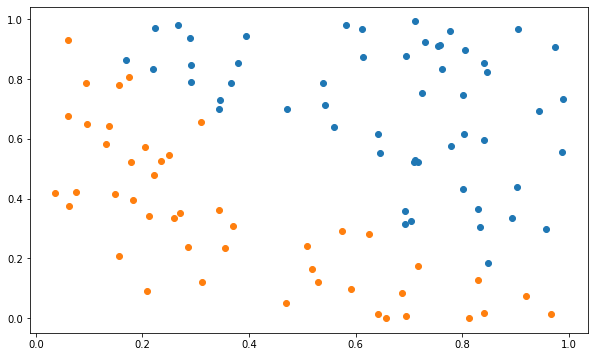

In [6]:
plt.figure(figsize=(10, 6))
plt.scatter(X[t==1, 0], X[t==1, 1])
plt.scatter(X[t==-1, 0], X[t==-1, 1])
plt.show()

In [7]:
a = np.zeros(2)

In [8]:
a

array([0., 0.])

[1.09, 0.44, 0.64, 0.28, 0.56, 0.6, 0.48, 0.32, 0.44, 0.48, 0.32, 0.32, 0.2, 0.24, 0.24, 0.24, 0.16, 0.4, 0.32, 0.28, 0.24, 0.24, 0.24, 0.24, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


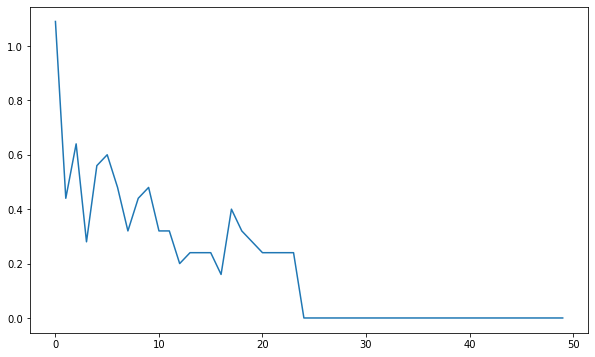

In [14]:
# Parameters
eta = 0.01
nb_epochs = 50
N = len(t)

# Initialize the weight vector and bias
w = np.zeros(2)
b = 0.

# Perceptron algorithm
losses = []

for epoch in range(nb_epochs):
    loss = 0
    
    # Iterate over all training examples
    for i in range(N):
        # Prediction
        y_i = np.sign(np.dot(w, X[i, :]) + b)
        # Update the weight
        w += eta * (t[i] - y_i) * X[i, :]
        # Update the bias
        b += eta * (t[i] - y_i) 
        # Loss mse
        loss += (t[i] - y_i)**2
        
    # Append 
    losses.append(loss/N)
print(losses)   
plt.figure(figsize=(10, 6))
plt.plot(losses)
plt.show()

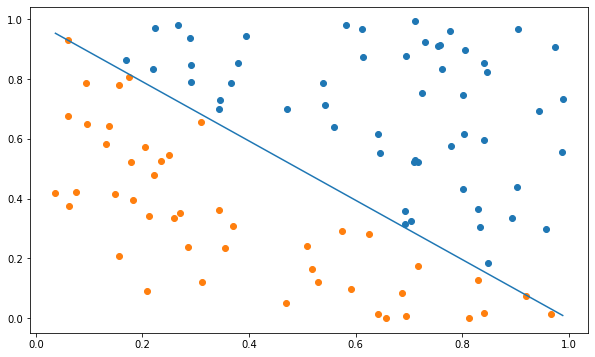

In [17]:
plt.figure(figsize=(10, 6)) 

# Data
plt.scatter(X[t==1, 0], X[t==1, 1])
plt.scatter(X[t==-1, 0], X[t==-1, 1])

# Model
x_min, x_max = X[:, 0].min(), X[:, 0].max()

plt.plot([x_min, x_max], [-(x_min*w[0] + b)/w[1], -(x_max*w[0] + b)/w[1]])

Error: 0.07


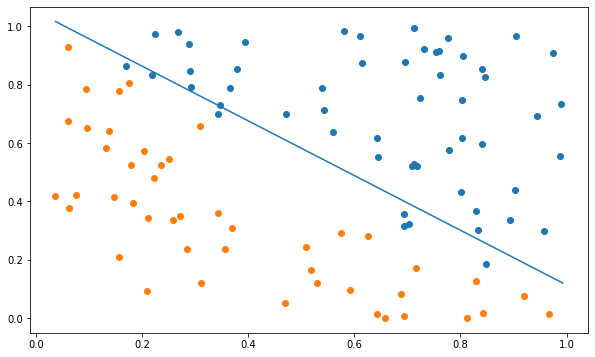

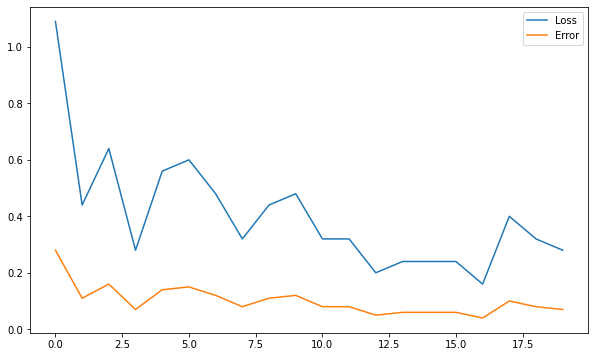

In [27]:
# Parameters
eta = 0.01
nb_epochs = 20
N = len(t)

# Initialize the weight vector and bias
w = np.zeros(2)
b = 0.

# Perceptron algorithm
errors = []
losses = []
for epoch in range(nb_epochs):
    loss = 0
    error = 0
    
    # Iterate over all training examples
    for i in range(N):
        # Prediction
        y_i = np.sign(np.dot(w, X[i, :]) + b)
        # Update the weight
        w += eta * (t[i] - y_i) * X[i, :]
        # Update the bias
        b += eta * (t[i] - y_i) 
        # Loss mse
        loss += (t[i] - y_i)**2
        # Count misclassifications
        if t[i] != y_i :
            error += 1
        
    # Append 
    losses.append(loss/N)
    errors.append(error/N)
    
print("Error:", error/N)  

plt.figure(figsize=(10, 6)) 
plt.scatter(X[t==1, 0], X[t==1, 1])
plt.scatter(X[t==-1, 0], X[t==-1, 1])
x_min, x_max = X[:, 0].min(), X[:, 1].max()
plt.plot([x_min, x_max], [-(x_min*w[0] + b)/w[1], -(x_max*w[0] + b)/w[1]])
    
plt.figure(figsize=(10, 6))
plt.plot(losses, label="Loss")
plt.plot(errors, label="Error")
plt.legend()
plt.show()

Error: 0.0


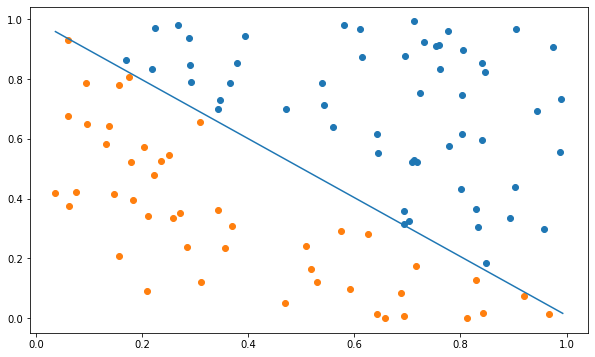

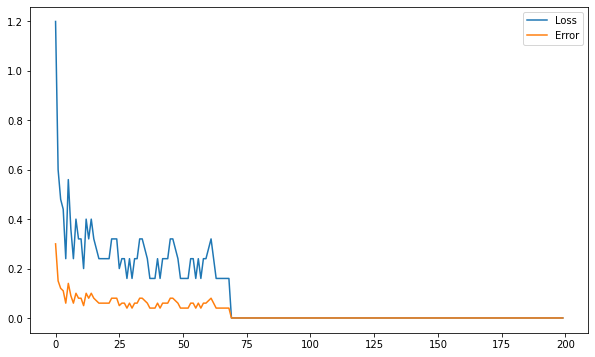

In [36]:
# Parameters
eta = 1
nb_epochs = 200
N = len(t)

# Initialize the weight vector and bias
w = np.array([-10.0, 10.0])
b = 0.

# Perceptron algorithm
errors = []
losses = []
for epoch in range(nb_epochs):
    loss = 0
    error = 0
    
    # Iterate over all training examples
    for i in range(N):
        # Prediction
        y_i = np.sign(np.dot(w, X[i, :]) + b)
        # Update the weight
        w += eta * (t[i] - y_i) * X[i, :]
        # Update the bias
        b += eta * (t[i] - y_i) 
        # Loss mse
        loss += (t[i] - y_i)**2
        # Count misclassifications
        if t[i] != y_i :
            error += 1
        
    # Append 
    losses.append(loss/N)
    errors.append(error/N)
    
print("Error:", error/N)  

plt.figure(figsize=(10, 6)) 
plt.scatter(X[t==1, 0], X[t==1, 1])
plt.scatter(X[t==-1, 0], X[t==-1, 1])
x_min, x_max = X[:, 0].min(), X[:, 1].max()
plt.plot([x_min, x_max], [-(x_min*w[0] + b)/w[1], -(x_max*w[0] + b)/w[1]])
    
plt.figure(figsize=(10, 6))
plt.plot(losses, label="Loss")
plt.plot(errors, label="Error")
plt.legend()
plt.show()

In [37]:
def create_dataset(n_samples):
    
    rng = np.random.default_rng()
    X = rng.uniform(0.0, 1.0, (n_samples-1, 2))
    t = np.array([1 if X[i, 0] + X[i, 1] > 1. else -1 for i in range(n_samples-1)])
    
    # Outlier
    X = np.append(X, np.array([0.1, 0.1]).reshape((1, 2)), axis=0)
    t = np.append(t, [1])
    return X, t

X, t = create_dataset(100)

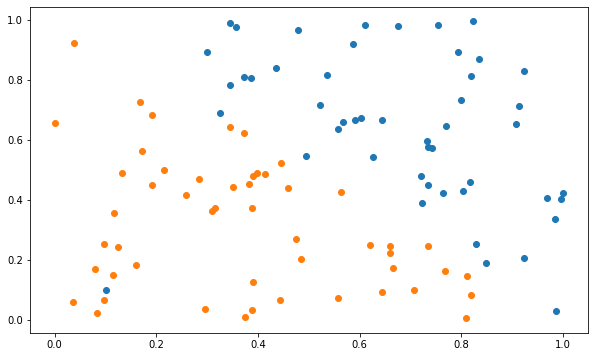

In [38]:
plt.figure(figsize=(10, 6))
plt.scatter(X[t==1, 0], X[t==1, 1])
plt.scatter(X[t==-1, 0], X[t==-1, 1])
plt.show()

Final error: 0.35


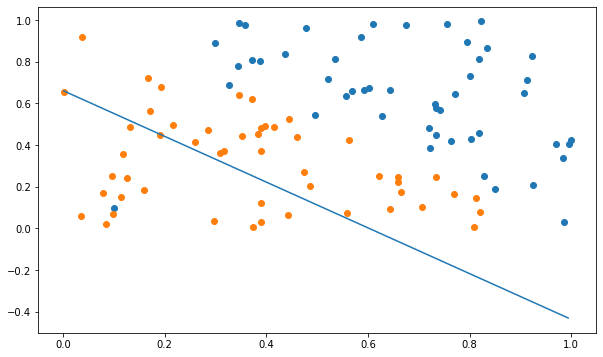

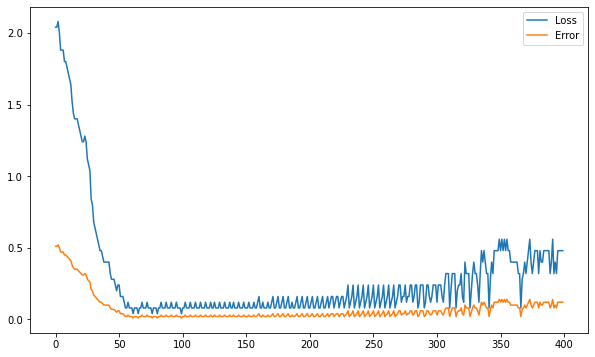

In [42]:
# Parameters
eta = 0.001
nb_epochs = 400
N = len(t)

# Initialize the weight vector and bias
w = np.array([-0.5, 0.5])
b = 0.

# Perceptron algorithm
errors = []
losses = []
for epoch in range(nb_epochs):
    loss = 0
    error = 0
    
    # Iterate over all training examples
    for i in range(N):
        # Prediction
        y_i = np.sign(np.dot(w, X[i, :]) + b)
        
        # Update the weight
        w += eta * (t[i] - y_i) * X[i, :] 
        
        # Update the bias
        b += eta * (t[i] - y_i) 
        
        # Loss mse
        loss += (t[i] - y_i)**2
        
        # Count misclassifications
        if t[i] != y_i :
            error += 1
        
    # Append 
    losses.append(loss/N)
    errors.append(error/N)

error = 0
for i in range(N):
    y_i = np.sign(np.dot(w, X[i, :]) + b)
    if t[i] != y_i :
        error += 1
print("Final error:", error/N)    
    
plt.figure(figsize=(10, 6)) 
plt.scatter(X[t==1, 0], X[t==1, 1])
plt.scatter(X[t==-1, 0], X[t==-1, 1])
x_min, x_max = X[:, 0].min(), X[:, 1].max()
plt.plot([x_min, x_max], [-(x_min*w[0] + b)/w[1], -(x_max*w[0] + b)/w[1]])
    
plt.figure(figsize=(10, 6))
plt.plot(losses, label="Loss")
plt.plot(errors, label="Error")
plt.legend()
plt.show()

In [43]:
def logistic(x):
    return 1. / (1 + np.exp(-x))

In [44]:
t[t==-1] = 0

Final error: 0.07


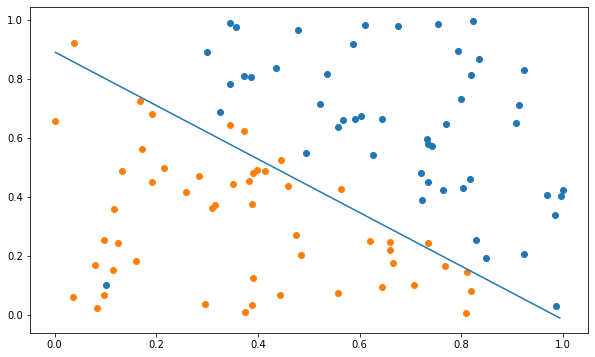

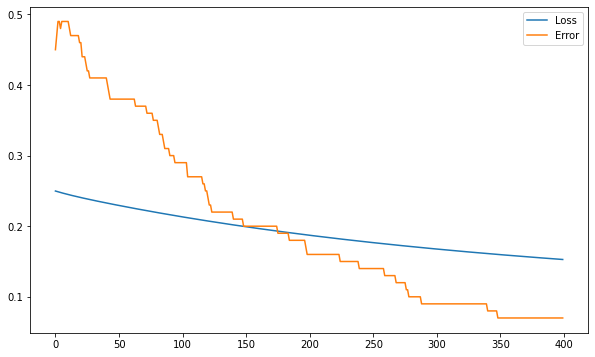

In [54]:
# Parameters
eta = 0.001
nb_epochs = 400
N = len(t)

# Initialize the weight vector and bias
w = np.zeros(2)
b = 0.

# Perceptron algorithm
errors = []
losses = []
for epoch in range(nb_epochs):
    loss = 0
    error = 0
    
    # Iterate over all training examples
    for i in range(N):
        # Probability
        y_i = logistic(np.dot(w, X[i, :]) + b)
        
        # Predicted class
        c_i = 1.0 if y_i > 0.5 else 0.0
        
        # Update the weight
        w += eta * (t[i] - y_i) * X[i, :] 
        
        # Update the bias
        b += eta * (t[i] - y_i) 
        
        # Loss mse
        loss += (t[i] - y_i)**2
        
        # Count misclassifications
        if t[i] != c_i :
            error += 1
        
    # Append 
    losses.append(loss/N)
    errors.append(error/N)
    

error = 0
for i in range(N):
    y_i = logistic(np.dot(w, X[i, :]) + b)
    c_i = 1.0 if y_i > 0.5 else 0.0
    if t[i] != c_i :
        error += 1
print("Final error:", error/N)    
    
plt.figure(figsize=(10, 6)) 
plt.scatter(X[t==1, 0], X[t==1, 1])
plt.scatter(X[t==0, 0], X[t==0, 1])
x_min, x_max = X[:, 0].min(), X[:, 1].max()
plt.plot([x_min, x_max], [-(x_min*w[0] + b)/w[1], -(x_max*w[0] + b)/w[1]])
    
plt.figure(figsize=(10, 6))
plt.plot(losses, label="Loss")
plt.plot(errors, label="Error")
plt.legend()
plt.show()